## 1. Melakukan Operasi pada gambar

In [1]:
import numpy as np
# Merupakan library OpenCV yang digunakan untuk pengolahan citra
import matplotlib.pyplot as plt
# library Numpy adalah alat bantu matematika yang seing digunakan dalam pengolahan citra
import cv2 as cv
# library matplotlib.pyplot yang digunakan untuk membuaut plot grafik dan visualisasi data

In [2]:
image = plt.imread("beanny.jpg")
#Membaca gambar "beanny.jpg" menggunakan fungsi 'plt.imread()' dari package matplotlib dan menyimpannya ke dalam variabel image
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#Mengubah gambar ke dalam mode grayscale dengan menggunakan fungsi cvtColor() dari package OpenCV dan menyimpannya ke dalam variabel gray_image 
negative = 434-gray_image
#Membuat gambar negatif dengan cara mengurangkan nilai piksel dari 434 (nilai maksimum) dengan nilai piksel pada gambar grayscale gray_image dan menyimpannya ke dalam variabel negative.

## A. Transalasi x = -50 dan y =  40

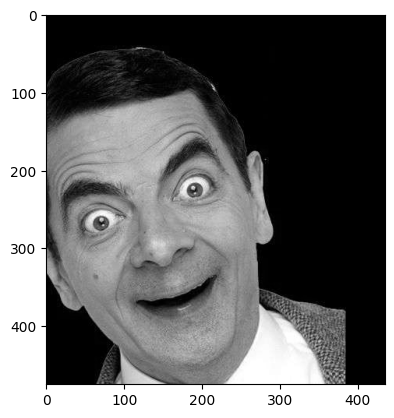

In [45]:
data=[]
# Membuat list kosong dengan nama data.
nol = np.zeros(50) 
#Membuat array numpy berisi 50 angka nol dan menyimpannya ke dalam variabel nol.
for i in range(len(gray_image)):
#Melakukan loop sebanyak jumlah baris pada gambar grayscale gray_image.
    simpan = gray_image[i][50:] 
    #Memotong bagian piksel dari kolom ke-50 sampai dengan piksel terakhir pada baris ke-i pada gambar gray_image dan menyimpannya ke dalam variabel simpan.
    data.append([*simpan,*nol]) 
    #Menambahkan gabungan dari nilai piksel pada simpan dan nol ke dalam list data.
hapus = data[:453]
#Membuat variabel hapus yang berisi elemen pertama hingga ke-453 dari list data.
nol = np.zeros(435) 
#Membuat array numpy berisi 435 angka nol dan menyimpannya ke dalam variabel nol.
for i in range(40): 
#Melakukan loop sebanyak 40 kali.
    hapus.insert(0, nol) 
    #Menambahkan array nol ke dalam elemen pertama dari list hapus.
plt.imshow(hapus,cmap="gray") 
#Menampilkan gambar hasil pemrosesan dengan menggunakan imshow() dari package matplotlib dan colormap "gray".

## B. Rotasi dengan sudut 70 derajat

In [3]:
def rotate_image(img, angle):
#Membuat sebuah fungsi bernama rotate_image dengan dua parameter yaitu img (gambar) dan angle (sudut rotasi).
    rotation_point = (img.shape[1] / 2, img.shape[0] / 2)
    #Menentukan titik pusat rotasi dengan membagi ukuran lebar dan tinggi gambar img dengan 2 dan menyimpannya ke dalam variabel rotation_point dalam bentuk tuple.
    rotation_matrix = cv.getRotationMatrix2D(rotation_point, angle, 1.0)
    #Menghitung matriks transformasi rotasi dengan menggunakan fungsi getRotationMatrix2D() dari package OpenCV dan menyimpannya ke dalam variabel rotation_matrix.
    rotated_img = cv.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
    #Mengaplikasikan transformasi rotasi pada gambar img dengan menggunakan fungsi warpAffine() dari package OpenCV dan menyimpan hasilnya ke dalam variabel rotated_img.

    return rotated_img
    #Mengembalikan gambar yang sudah dirotasi dalam bentuk rotated_img dari fungsi.

In [15]:
def rotIMG (image, angle):
#Membuat sebuah fungsi bernama rotIMG dengan dua parameter yaitu image (gambar) dan angle (sudut rotasi).
    angle = -angle*(np.pi/180)
    #Menghitung nilai sudut rotasi dalam radian dan menyimpannya ke dalam variabel angle.
    cos = np.round(np.cos(angle)).astype(int)
    #Menghitung nilai cosinus dari sudut rotasi dan membulatkannya menjadi integer, lalu menyimpannya ke dalam variabel cos.
    sin = np.round(np.sin(angle)).astype(int)
    #Menghitung nilai sinus dari sudut rotasi dan membulatkannya menjadi integer, lalu menyimpannya ke dalam variabel sin.
    center_x = image.shape[0]//2
    #Menentukan koordinat x dari titik pusat rotasi dengan membagi ukuran lebar gambar image dengan 2 dan menyimpannya ke dalam variabel center_x.
    center_y = image.shape[1]//2
    #Menentukan koordinat y dari titik pusat rotasi dengan membagi ukuran tinggi gambar image dengan 2 dan menyimpannya ke dalam variabel center_y.
    resultImg = np.zeros(image.shape).astype(int)
    #Membuat array numpy berukuran sama dengan image yang diisi dengan angka nol dan menyimpannya ke dalam variabel resultImg.
    for i in range(image.shape[0]):
    #Melakukan loop sebanyak jumlah baris pada gambar image.
        for j in range(image.shape[1]):
        #Melakukan loop sebanyak jumlah kolom pada gambar image.
            x2 = (i - center_x) * cos - (j - center_y) * sin + center_x
            #Menghitung koordinat x dari piksel setelah rotasi dengan menggunakan formula transformasi rotasi pada koordinat x dan menyimpannya ke dalam variabel x2.
            y2 = (i - center_x) * sin + (j - center_y) * cos + center_y
            #Menghitung koordinat y dari piksel setelah rotasi dengan menggunakan formula transformasi rotasi pada koordinat y dan menyimpannya ke dalam variabel y2.
            if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
            #Mengecek apakah koordinat piksel yang sudah dirotasi berada dalam range ukuran gambar image.
                resultImg[i][j]=image[x2][y2]
                #Memasukkan nilai piksel dari koordinat yang sudah dirotasi ke dalam array resultImg.
    return resultImg
    #Mengembalikan gambar yang sudah dirotasi dalam bentuk resultImg dari fungsi.

In [16]:
def fixrotIMG (image, angle):
    angle = -angle*(np.pi/180)
    cos = (np.cos(angle))
    sin = (np.sin(angle))
    center_x = image.shape[0]//2
    center_y = image.shape[1]//2
    resultImg = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x2 = int((i - center_x) * cos - (j - center_y) * sin + center_x)
            y2 = int((i - center_x) * sin + (j - center_y) * cos + center_y)
            if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                resultImg[i][j]=image[x2][y2]
    return resultImg

In [29]:
def rotIMG2 (image):
    rotasi = np.zeros((image.shape)).astype(int) #membuat matriks 0 dengan ukuran 256x256
    angle = 70*(np.pi/180) #membuat variabel untuk menyimpan sudut rotasi yang diinginkan

    center_x = image.shape[0]/2
    center_y = image.shape[1]/2

    for i in range(image.shape[0]): #membuat kondisi perulangan untuk mengakses tiap indeks baris pada citra
        for j in range(image.shape[1]): #membuat kondisi perulperulangan untuk mengakses tiap indeks kolom pada citra
            x2 = int((i - center_x) * np.cos(angle) - (j - center_y) * np.sin(angle) + center_x) #membuat x2 yaitu variabel untuk  menyimpan perubahan indeks hasil rotasi dari indeks awal terhadap sumbu x
            y2 = int((i - center_x) * np.sin(angle) + (j - center_y) * np.cos(angle) + center_y) #membuat y2 yaitu variabel untuk  menyimpan perubahan indeks hasil rotasi dari indeks awal terhadap sumbu y
            if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]: #kondisi dimana piksel yang akan disimpan adalah piksel yang berada pada rentang index 0-255
                rotasi[i][j] = image[x2][y2] #menyimpan piksel yang masuk kondisi di atas dalam matriks hasil rotasi
    return rotasi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

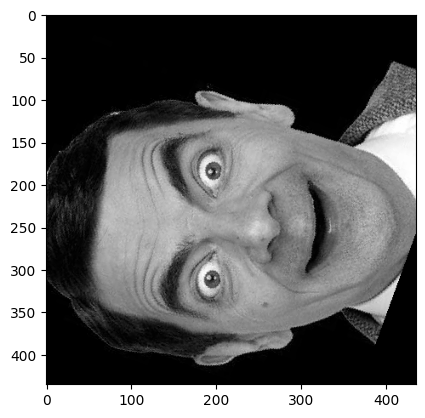

In [30]:
rotimg = fixrotIMG(gray_image,70)
plt.imshow(rotimg,cmap = "gray")
rotimg

## C. Pencerminan terhadap sumbu x dan sumbu y

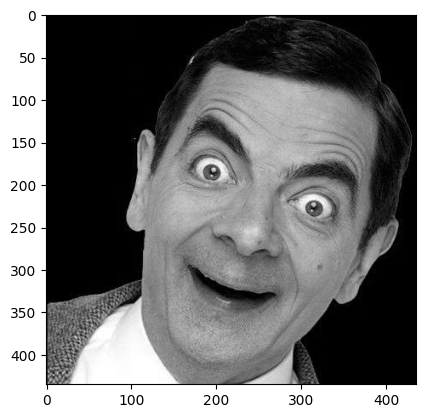

In [19]:

matriks = np.zeros([435, 435]) 
for i in range(len(gray_image)): 
    for j in range(len(gray_image)): 
        matriks[i][j] = gray_image[i][-j] 
plt.imshow(matriks, cmap="gray")

## D. Dilatasi matriks skala = 3

In [20]:
def dilZoomIn(image, skala):
    result = np.zeros([image.shape[0]*skala, image.shape[1]*skala]).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(i*skala, (i*2)+skala):
                for y in range(j*skala, (j*2)+skala):
                    result[x][y] = image[i][j]
    return result

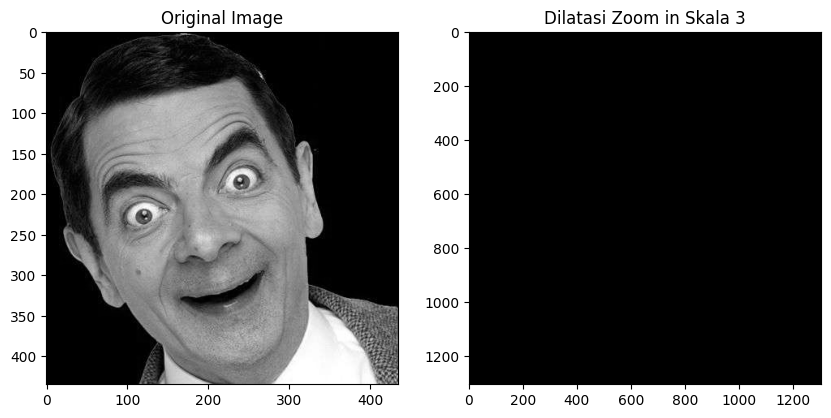

In [42]:
zoomIN=dilZoomIn(gray_image,3)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(zoomIN, cmap="gray")
ax[1].set_title('Dilatasi Zoom in Skala 3')

plt.show()

## 2. operasi citra negatif dan citra grayscale lalu dibandingkan

In [22]:
def notImg (image):
    resultImg = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            resultImg[i,j]= ~image[i,j]
    return resultImg

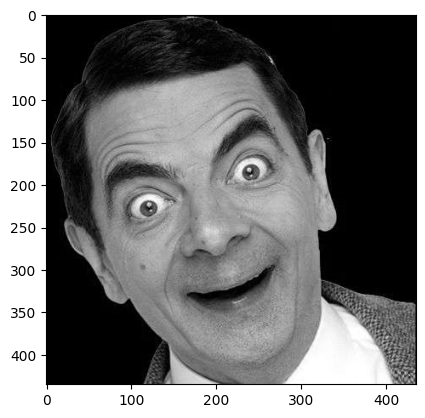

In [23]:
plt.imshow(gray_image, cmap="gray")

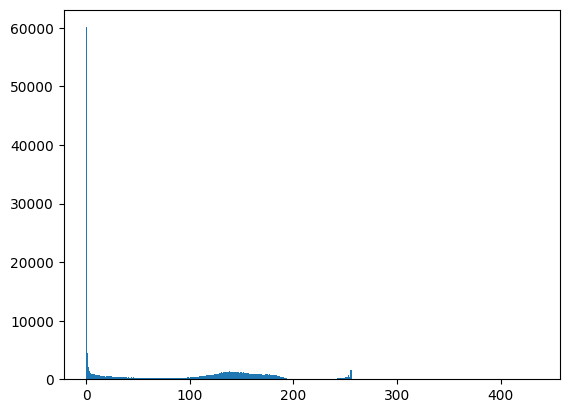

In [24]:
plt.hist(gray_image.ravel(),435,[0,435])
plt.show()

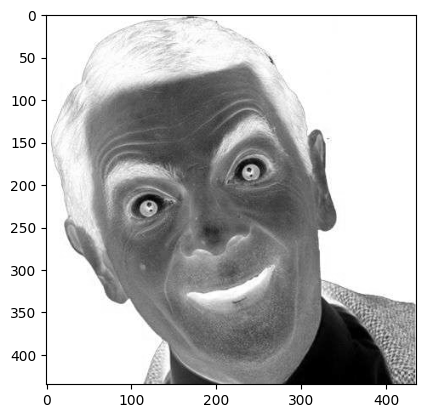

In [25]:
plt.imshow(negative, cmap="gray")

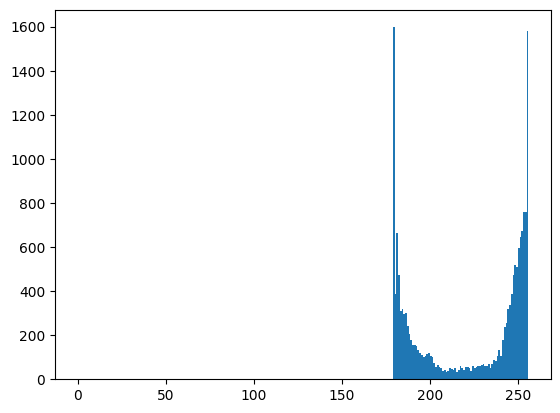

In [26]:
plt.hist(negative.ravel(),256,[0,256]) 
plt.show() 